# Forest Cover Type

https://www.kaggle.com/c/forest-cover-type-kernels-only

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

#### Data Fields
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

#### The wilderness areas are:

1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area

#### The soil types are:

1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.

# Import Libraries

In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Analysis
### Data Understanding

In [528]:
forest_df = pd.read_csv('train.csv')
forest_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
Elevation,2596,2590,2804,2785,2595
Aspect,51,56,139,155,45
Slope,3,2,9,18,2
Horizontal_Distance_To_Hydrology,258,212,268,242,153
Vertical_Distance_To_Hydrology,0,-6,65,118,-1
Horizontal_Distance_To_Roadways,510,390,3180,3090,391
Hillshade_9am,221,220,234,238,220
Hillshade_Noon,232,235,238,238,234
Hillshade_3pm,148,151,135,122,150


#### Observations
##### Variable Types
- Elevation - Continuous
- Aspect  - Continuous
- Slope - Continuous
- Horizontal_Distance_To_Hydrology - Continuous
- Vertical_Distance_To_Hydrology - Continuous
- Horizontal_Distance_To_Roadways	 - Continuous
- Hillshade_9am	 - Continuous
- Hillshade_Noon	 - Continuous
- Hillshade_3pm	 - Continuous
- Horizontal_Distance_To_Fire_Points	 - Continuous
- Wilderness_Area1 - Wilderness_Area4 - Binary
- Soil_Type1 - Soil_Type40 - Binary
- Cover_Type - Nominal (Target Variable)

In [529]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

#### Observations
- Total rows in the dataset is 15120
- Total columns in the dataset is 56
- No null values found in the dataset 

In [530]:
forest_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


#### Observations
- Vertical_Distance_To_Hydrology column has negative values.
- Check for outliers for the following columns
    - Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points

### Data Visualization

###### Cover_Type (Target Variable)

In [531]:
print(forest_df['Cover_Type'].value_counts())

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64


###### Elevation

Text(0.5,1,'Elevation for Cover_Types')

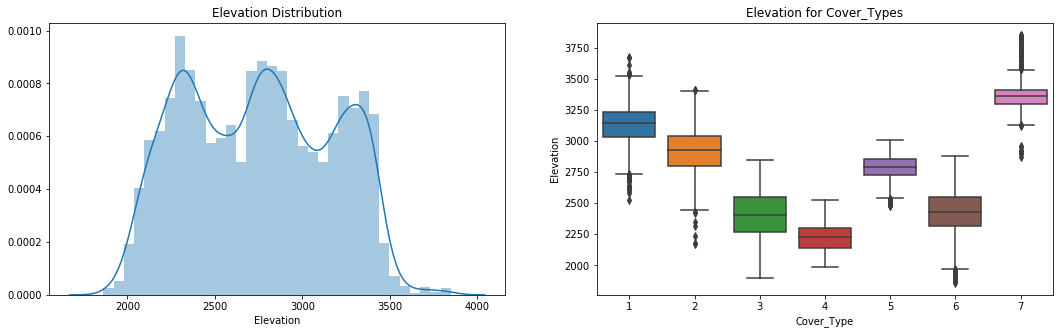

In [532]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Elevation'])
plt.title('Elevation Distribution')

plt.subplot(1,2,2)
sns.boxplot(x = 'Cover_Type', y = 'Elevation', data = forest_df )
plt.title('Elevation for Cover_Types')

###### Aspect

Text(0.5,1,'Aspect for Cover_Types')

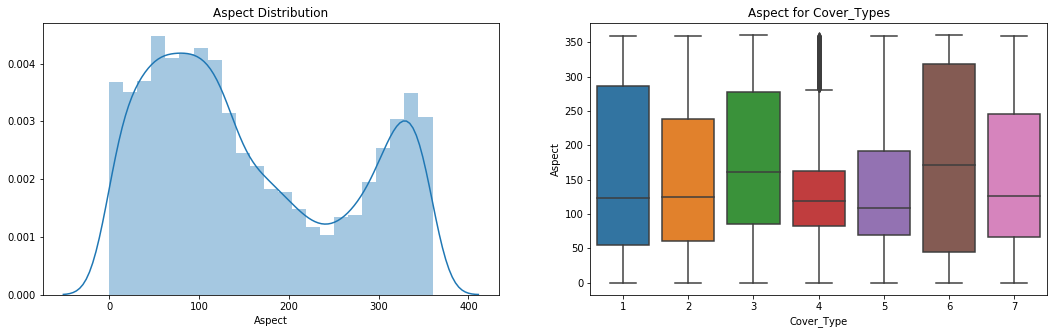

In [533]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Aspect'])
plt.title('Aspect Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Aspect', data = forest_df)
plt.title('Aspect for Cover_Types')

###### Slope

Text(0.5,1,'Slope for Cover_Types')

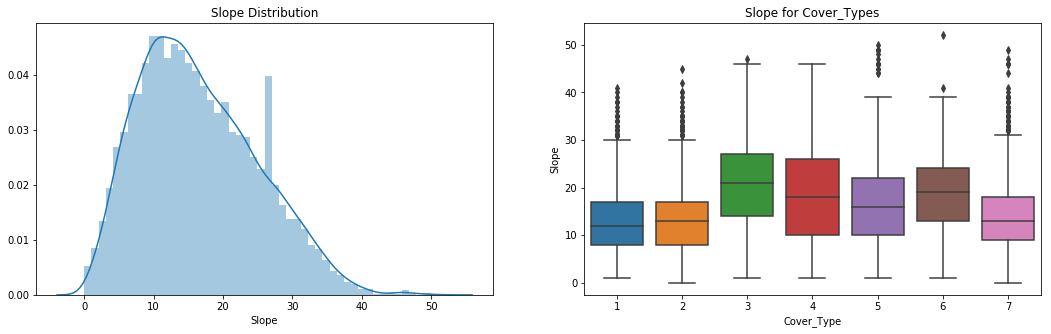

In [534]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Slope'])
plt.title('Slope Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Slope', data = forest_df)
plt.title('Slope for Cover_Types')

Slope is skewed left. So lets see the log transformed Slope 

Text(0.5,1,'Slope_Log for Cover_Types')

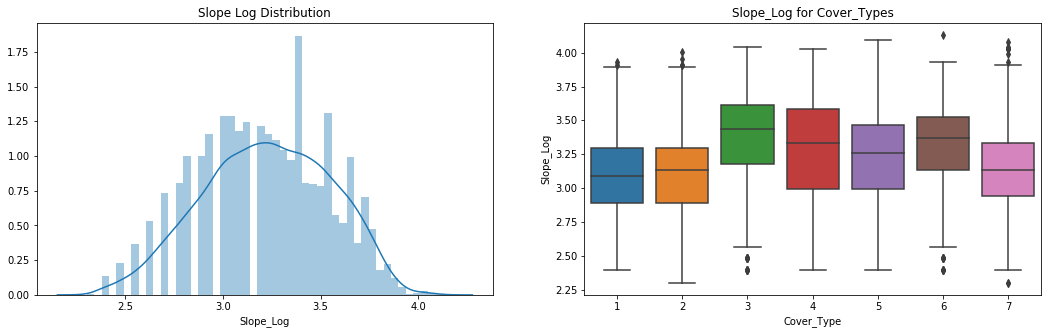

In [535]:
plt.figure(figsize=(18,5))

forest_df['Slope_Log'] = np.log(forest_df['Slope']+10)

plt.subplot(1,2,1)
sns.distplot(forest_df['Slope_Log'])
plt.title('Slope Log Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Slope_Log', data = forest_df)
plt.title('Slope_Log for Cover_Types')

###### Observation
- Slope between 25 to 30 has some abnormal spike. So plotting for that range
- Looks like Cover_Type 6 for Slope_Log > 4.00 has got some outliers

Text(0.5,1,'Slope Distribution for Cover_Types')

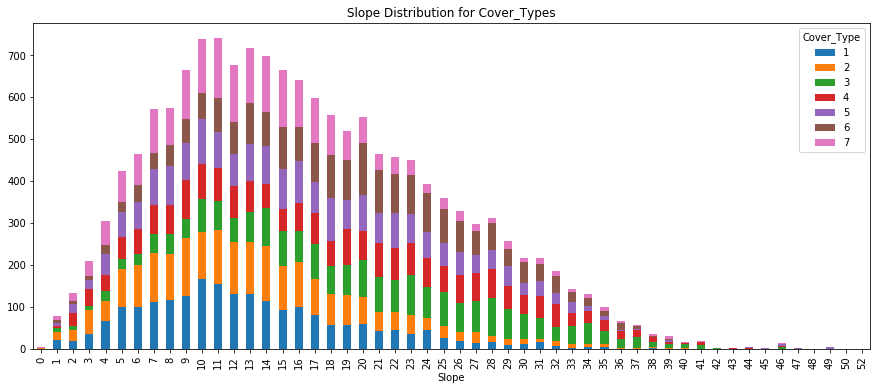

In [536]:
#plt.figure(figsize=(18,5))
#sns.countplot(x='Slope', hue='Cover_Type', data = forest_df.query( 'Slope >= 25 and Slope <= 30' ) ) 
#plt.legend(loc='best')
pd.crosstab(forest_df['Slope'], forest_df['Cover_Type']).plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Slope Distribution for Cover_Types')

###### Horizontal_Distance_To_Hydrology

Text(0.5,1,'Horizontal_Distance_To_Hydrology for Cover_Types')

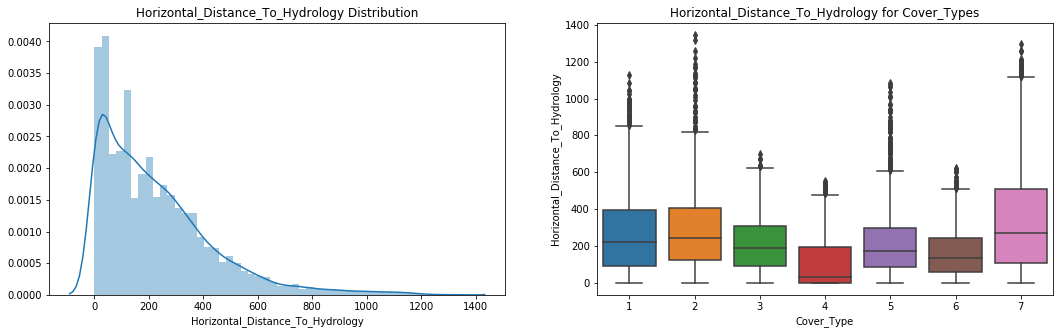

In [537]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Horizontal_Distance_To_Hydrology'])
plt.title('Horizontal_Distance_To_Hydrology Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data = forest_df)
plt.title('Horizontal_Distance_To_Hydrology for Cover_Types')

Horizontal_Distance_To_Hydrology is skewed left. So lets see the log transformed Horizontal_Distance_To_Hydrology 

Text(0.5,1,'Horizontal_Distance_To_Hydrology_Log for Cover_Types')

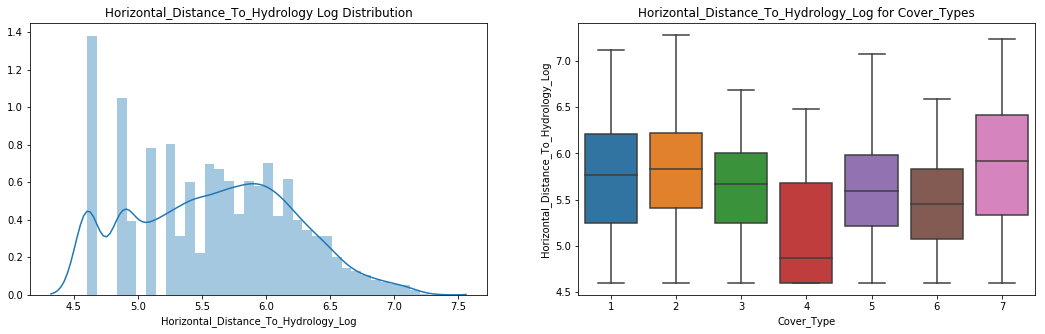

In [538]:
plt.figure(figsize=(18,5))

forest_df['Horizontal_Distance_To_Hydrology_Log'] = np.log(forest_df['Horizontal_Distance_To_Hydrology']+100)

plt.subplot(1,2,1)
sns.distplot(forest_df['Horizontal_Distance_To_Hydrology_Log'])
plt.title('Horizontal_Distance_To_Hydrology Log Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology_Log', data = forest_df)
plt.title('Horizontal_Distance_To_Hydrology_Log for Cover_Types')

###### Vertical_Distance_To_Hydrology

Text(0.5,1,'Vertical_Distance_To_Hydrology for Cover_Types')

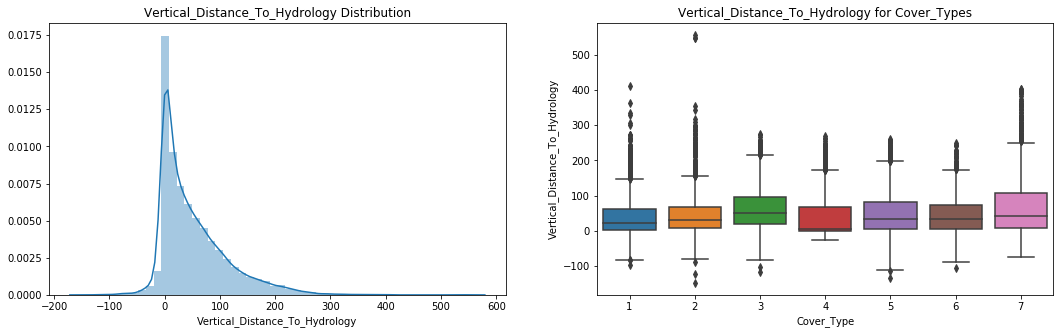

In [539]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Vertical_Distance_To_Hydrology'])
plt.title('Vertical_Distance_To_Hydrology Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', data = forest_df)
plt.title('Vertical_Distance_To_Hydrology for Cover_Types')

Vertical_Distance_To_Hydrology is skewed left. So lets see the log transformed Vertical_Distance_To_Hydrology 

Text(0.5,1,'Vertical_Distance_To_Hydrology for Cover_Types')

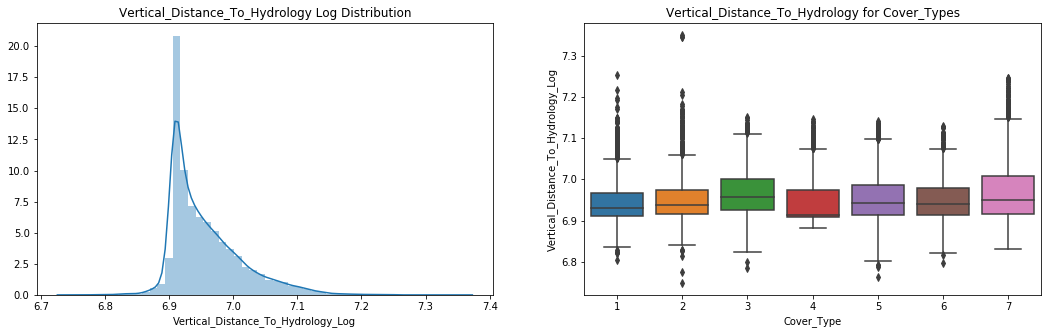

In [540]:
plt.figure(figsize=(18,5))

forest_df['Vertical_Distance_To_Hydrology_Log'] = np.log(forest_df['Vertical_Distance_To_Hydrology']+1000)

plt.subplot(1,2,1)
sns.distplot(forest_df['Vertical_Distance_To_Hydrology_Log'])
plt.title('Vertical_Distance_To_Hydrology Log Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology_Log', data = forest_df)
plt.title('Vertical_Distance_To_Hydrology for Cover_Types')

###### Observation
- found few negative observations for Vertical_Distance_To_Hydrology
- Cover_Type 2 has got an outlier at Vertical_Distance_To_Hydrology_Log > 7.3

###### Horizontal_Distance_To_Roadways

Text(0.5,1,'Horizontal_Distance_To_Roadways for Cover_Types')

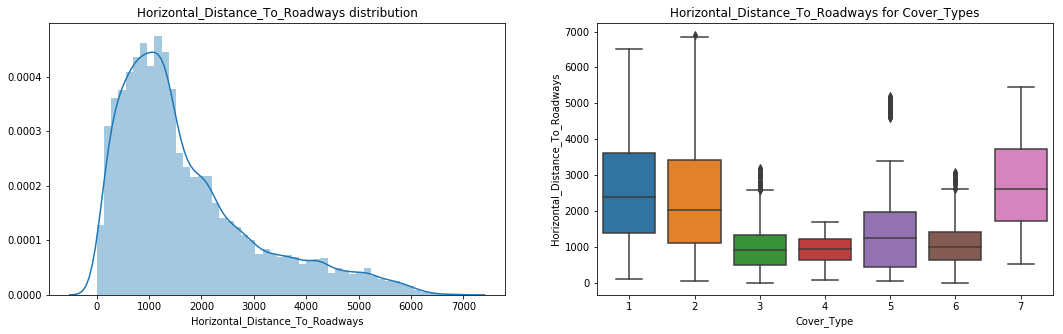

In [541]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Horizontal_Distance_To_Roadways'])
plt.title('Horizontal_Distance_To_Roadways distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways', data = forest_df)
plt.title('Horizontal_Distance_To_Roadways for Cover_Types')

Horizontal_Distance_To_Roadways is skewed left. So lets see the log transformed Horizontal_Distance_To_Roadways 

Text(0.5,1,'Horizontal_Distance_To_Roadways_Log for Cover_Types')

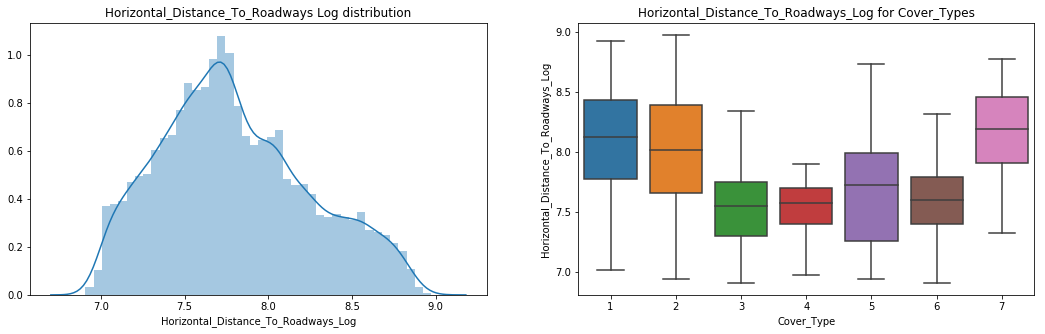

In [542]:
plt.figure(figsize=(18,5))

forest_df['Horizontal_Distance_To_Roadways_Log'] = np.log(forest_df['Horizontal_Distance_To_Roadways']+1000)

plt.subplot(1,2,1)
sns.distplot(forest_df['Horizontal_Distance_To_Roadways_Log'])
plt.title('Horizontal_Distance_To_Roadways Log distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways_Log', data = forest_df)
plt.title('Horizontal_Distance_To_Roadways_Log for Cover_Types')

###### Hillshade_9am, Hillshade_Noon, Hillshade_3pm

Text(0.5,1,'HillShades for Cover_Type')

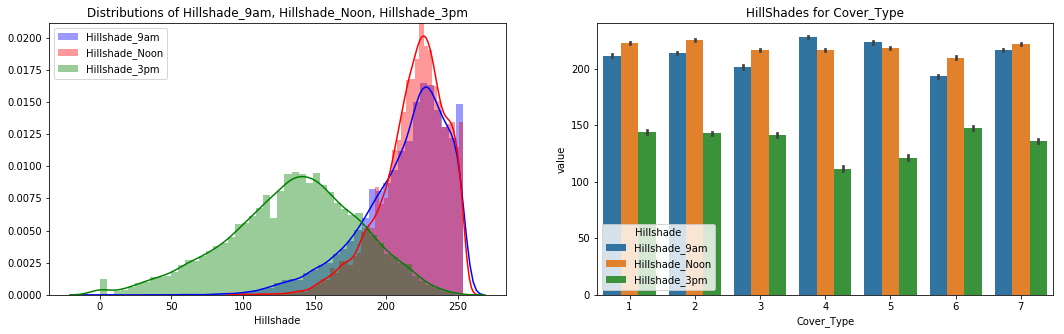

In [543]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
ax = sns.distplot(forest_df['Hillshade_9am'], color='b', label='Hillshade_9am')
ax = sns.distplot(forest_df['Hillshade_Noon'], color='r', label='Hillshade_Noon')
ax = sns.distplot(forest_df['Hillshade_3pm'], color='g', label='Hillshade_3pm')
ax.legend()
plt.xlabel('Hillshade')
plt.title('Distributions of Hillshade_9am, Hillshade_Noon, Hillshade_3pm')

plt.subplot(1,2,2)
hillshade_df = forest_df.loc[ : , ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Cover_Type'] ]
hillshade_df = pd.melt(hillshade_df, 'Cover_Type', var_name='Hillshade')
sns.barplot(x='Cover_Type', y='value', hue='Hillshade', data=hillshade_df)
plt.title('HillShades for Cover_Type')

Hillshade_9am, Hillshade_Noon is skewed right. So lets see the log transformed

Text(0.5,1,'Hillshade_3pm for Cover_Types')

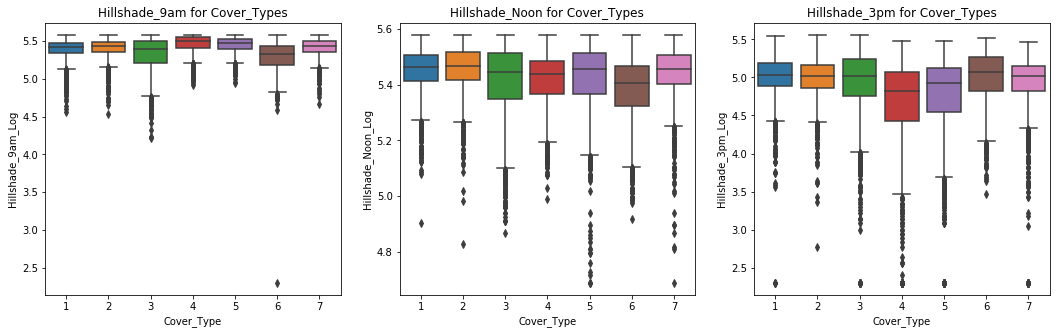

In [544]:
forest_df['Hillshade_9am_Log'] = np.log(forest_df['Hillshade_9am']+10)
forest_df['Hillshade_Noon_Log'] = np.log(forest_df['Hillshade_Noon']+10)
forest_df['Hillshade_3pm_Log'] = np.log(forest_df['Hillshade_3pm']+10)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.boxplot(x='Cover_Type', y='Hillshade_9am_Log', data=forest_df)
plt.title('Hillshade_9am for Cover_Types')

plt.subplot(1,3,2)
sns.boxplot(x='Cover_Type', y='Hillshade_Noon_Log', data=forest_df)
plt.title('Hillshade_Noon for Cover_Types')

plt.subplot(1,3,3)
sns.boxplot(x='Cover_Type', y='Hillshade_3pm_Log', data=forest_df)
plt.title('Hillshade_3pm for Cover_Types')

- Looks like Hillshade_9am_Log < 2.5 for Cover_Type 6 has got some outliers
- Looks like Hillshade_Noon_Log < 5.0 for Cover_Type 1 has got some outliers
- Looks like Hillshade_Noon_Log < 4.9 for Cover_Type 2 has got some outliers
- Looks like Hillshade_Noon_Log < 4.7 for Cover_Type 7 has got some outliers
- Looks like Hillshade_3pm_Log < 3.0 for Cover_Type 1,2,3,5,7 has got some outliers

###### Horizontal_Distance_To_Fire_Points

Text(0.5,1,'Horizontal_Distance_To_Fire_Points for Cover_Types')

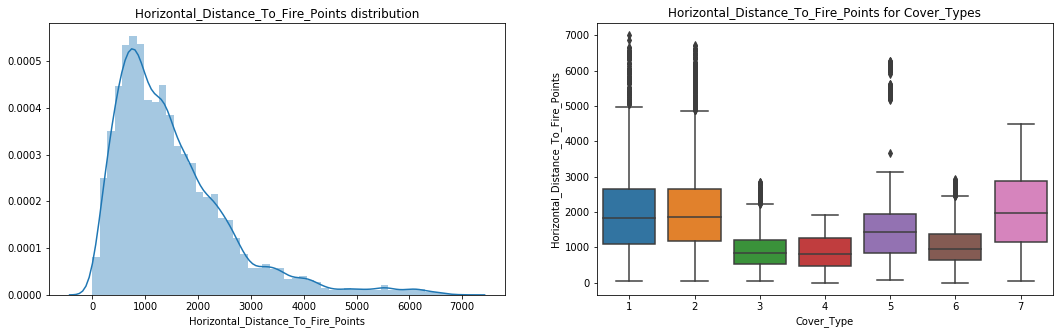

In [545]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Horizontal_Distance_To_Fire_Points'])
plt.title('Horizontal_Distance_To_Fire_Points distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', data = forest_df)
plt.title('Horizontal_Distance_To_Fire_Points for Cover_Types')

Horizontal_Distance_To_Fire_Points is skewed left. So lets see the log transformed

Text(0.5,1,'Horizontal_Distance_To_Fire_Points_Log for Cover_Types')

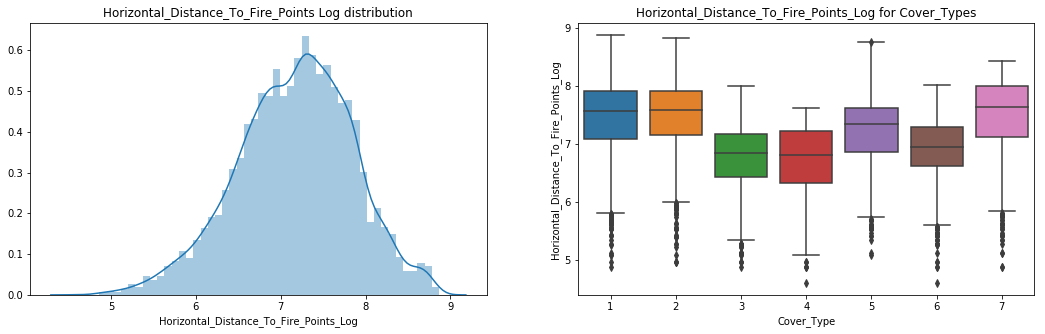

In [546]:
forest_df['Horizontal_Distance_To_Fire_Points_Log'] = np.log(forest_df['Horizontal_Distance_To_Fire_Points']+100)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Horizontal_Distance_To_Fire_Points_Log'])
plt.title('Horizontal_Distance_To_Fire_Points Log distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points_Log', data = forest_df)
plt.title('Horizontal_Distance_To_Fire_Points_Log for Cover_Types')

###### Wilderness_Area 1 to 4

Text(0.5,1,'Wilderness_Area for Cover_Types')

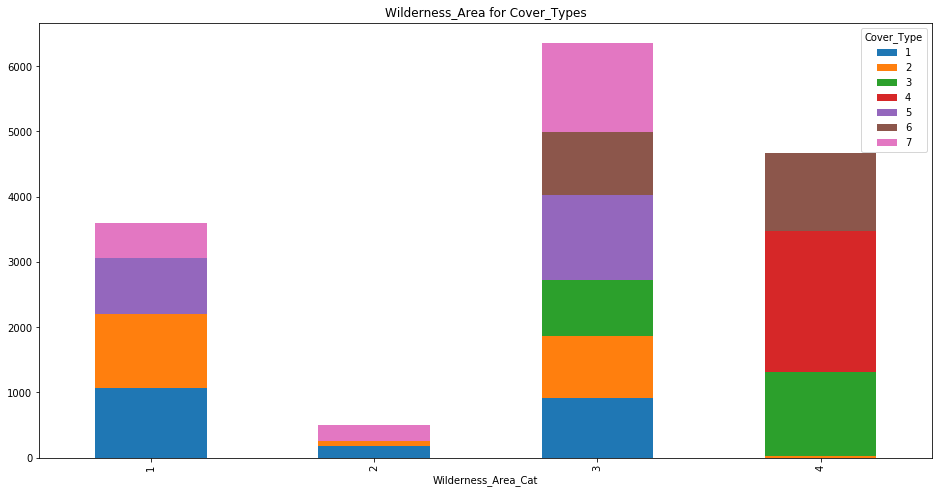

In [547]:
Wilderness_Area_df = forest_df.loc[ : , ['Wilderness_Area1', 'Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']]
Wilderness_Area_df['Wilderness_Area_Cat'] = Wilderness_Area_df.idxmax(axis=1)
Wilderness_Area_df['Wilderness_Area_Cat'] = Wilderness_Area_df['Wilderness_Area_Cat'].apply(lambda x : x.replace('Wilderness_Area',''))

Wilderness_Area_df = pd.concat([Wilderness_Area_df['Wilderness_Area_Cat'], forest_df['Cover_Type']], axis=1)

pd.crosstab(Wilderness_Area_df['Wilderness_Area_Cat'], Wilderness_Area_df['Cover_Type']).plot(kind='bar', stacked=True, figsize=(16,8))
#sns.countplot(x='Wilderness_Area_Cat', hue='Cover_Type', data=Wilderness_Area_df)
plt.title('Wilderness_Area for Cover_Types')

###### Observation
- Cover_Type 1 & 7 is observed for Wilderness_Area types 1, 2 & 3
- Cover_type 2 is almost spread across all Wilderness_Area types
- Cover_type 3 & 6 is observed for Wilderness_Area types 3 & 4
- Cover_type 4 is observed for Wilderness_Area type 4
- Cover_type 5 is observed for Wilderness_Area types 1 & 3

###### Soil_Type 1 to 40

Text(0.5,1,'Soil_Type for Cover_Types')

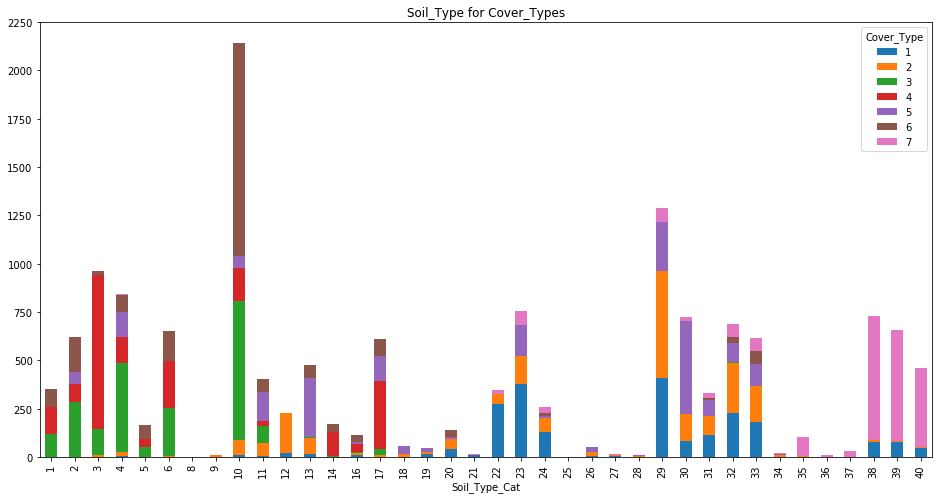

In [548]:
Soil_Type_df = forest_df.loc[ : , ['Soil_Type1', 'Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5', 'Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10',
                                   'Soil_Type11', 'Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15', 'Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
                                   'Soil_Type21', 'Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25', 'Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
                                   'Soil_Type31', 'Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35', 'Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40']]
Soil_Type_df['Soil_Type_Cat'] = Soil_Type_df.idxmax(axis=1)
Soil_Type_df['Soil_Type_Cat'] = Soil_Type_df['Soil_Type_Cat'].apply(lambda x : x.replace('Soil_Type',''))

Soil_Type_df = pd.concat([Soil_Type_df['Soil_Type_Cat'], forest_df['Cover_Type']], axis=1)
Soil_Type_df['Soil_Type_Cat'] = pd.to_numeric(Soil_Type_df['Soil_Type_Cat'])
Soil_Type_df = Soil_Type_df.sort_values('Soil_Type_Cat')

pd.crosstab(Soil_Type_df['Soil_Type_Cat'], Soil_Type_df['Cover_Type']).plot(kind='bar', stacked=True, figsize=(16,8))
plt.title('Soil_Type for Cover_Types')

###### Observation
- Soil_Type of 7 and 15 has no observations

- Cover_Type 1 is observed for Soil_Type greater than 10
- Cover_Type 2 is almost spread across all Soil_Types but observed more between the range of 10 - 35
- Cover_Type 3 is observed for Soil_Type < 11
- Cover_Type 4 is observed for Soil_Type < 17
- Cover_Type 5 is observed for Soil_Type < 33
- Cover_Type 6 is observed for Soil_Type < 20
- Cover_Type 7 is observed for Soil_Type > 20

# Data Cleaning

### Check for Outliers based on above observations

###### Slope_Log > 4.00 for CoverType 6

In [549]:
forest_df.query('Slope_Log > 4.00 & Cover_Type == 6')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type40,Cover_Type,Slope_Log,Horizontal_Distance_To_Hydrology_Log,Vertical_Distance_To_Hydrology_Log,Horizontal_Distance_To_Roadways_Log,Hillshade_9am_Log,Hillshade_Noon_Log,Hillshade_3pm_Log,Horizontal_Distance_To_Fire_Points_Log
2241,2242,2618,301,52,124,59,1789,0,157,231,...,0,6,4.127134,5.411646,6.96508,7.933438,2.302585,5.117994,5.484797,7.31055


###### Hillshade_9am_Log < 2.5 for Cover_Type 6

In [550]:
forest_df.query('Hillshade_9am_Log < 2.5 & Cover_Type == 6')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type40,Cover_Type,Slope_Log,Horizontal_Distance_To_Hydrology_Log,Vertical_Distance_To_Hydrology_Log,Horizontal_Distance_To_Roadways_Log,Hillshade_9am_Log,Hillshade_Noon_Log,Hillshade_3pm_Log,Horizontal_Distance_To_Fire_Points_Log
2241,2242,2618,301,52,124,59,1789,0,157,231,...,0,6,4.127134,5.411646,6.96508,7.933438,2.302585,5.117994,5.484797,7.31055


Both conditions has got outlier on same record

###### Vertical_Distance_To_Hydrology_Log > 7.3  for Cover_Type 2

In [551]:
forest_df.query('Vertical_Distance_To_Hydrology_Log > 7.3 & Cover_Type == 2')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type40,Cover_Type,Slope_Log,Horizontal_Distance_To_Hydrology_Log,Vertical_Distance_To_Hydrology_Log,Horizontal_Distance_To_Roadways_Log,Hillshade_9am_Log,Hillshade_Noon_Log,Hillshade_3pm_Log,Horizontal_Distance_To_Fire_Points_Log
1803,1804,2931,283,26,778,554,854,138,230,227,...,0,2,3.583519,6.777647,7.348588,7.525101,4.997212,5.480639,5.468060,7.916443
1892,1893,2922,272,31,799,547,875,123,231,238,...,0,2,3.713572,6.801283,7.344073,7.536364,4.890349,5.484797,5.513429,7.712444
11938,11939,2924,272,32,816,547,886,122,231,238,...,0,2,3.737670,6.820016,7.344073,7.542213,4.882802,5.484797,5.513429,7.883823


###### Hillshade_Noon_Log < 5.0 for Cover_Type 1

In [552]:
forest_df.query('Hillshade_Noon_Log < 5.0 & Cover_Type == 1')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type40,Cover_Type,Slope_Log,Horizontal_Distance_To_Hydrology_Log,Vertical_Distance_To_Hydrology_Log,Horizontal_Distance_To_Roadways_Log,Hillshade_9am_Log,Hillshade_Noon_Log,Hillshade_3pm_Log,Horizontal_Distance_To_Fire_Points_Log
1517,1518,3244,54,40,255,146,4039,209,125,0,...,0,1,3.912023,5.872118,7.044033,8.524963,5.389072,4.905275,2.302585,7.134094


###### Hillshade_Noon_Log < 4.9 for Cover_Type 2

In [553]:
forest_df.query('Hillshade_Noon_Log < 4.9 & Cover_Type == 2')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type40,Cover_Type,Slope_Log,Horizontal_Distance_To_Hydrology_Log,Vertical_Distance_To_Hydrology_Log,Horizontal_Distance_To_Roadways_Log,Hillshade_9am_Log,Hillshade_Noon_Log,Hillshade_3pm_Log,Horizontal_Distance_To_Fire_Points_Log
9903,9904,3101,4,45,240,25,1172,123,115,98,...,0,2,4.007333,5.828946,6.932448,7.683404,4.890349,4.828314,4.682131,7.418781


###### Hillshade_Noon_Log < 4.7 for Cover_Type 7

In [554]:
forest_df.query('Hillshade_Noon_Log < 4.7 & Cover_Type == 7')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type40,Cover_Type,Slope_Log,Horizontal_Distance_To_Hydrology_Log,Vertical_Distance_To_Hydrology_Log,Horizontal_Distance_To_Roadways_Log,Hillshade_9am_Log,Hillshade_Noon_Log,Hillshade_3pm_Log,Horizontal_Distance_To_Fire_Points_Log
8193,8194,3393,73,49,306,153,2305,218,99,0,...,0,7,4.077537,6.006353,7.050123,8.103192,5.429346,4.691348,2.302585,6.632002


###### Hillshade_3pm_Log < 3.0 for Cover_Type 1,2,3,5,7

In [555]:
forest_df.query('Hillshade_3pm_Log < 3.0 & ( Cover_Type == 1 | Cover_Type == 2 | Cover_Type == 3 | Cover_Type == 5 | Cover_Type == 7)')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type40,Cover_Type,Slope_Log,Horizontal_Distance_To_Hydrology_Log,Vertical_Distance_To_Hydrology_Log,Horizontal_Distance_To_Roadways_Log,Hillshade_9am_Log,Hillshade_Noon_Log,Hillshade_3pm_Log,Horizontal_Distance_To_Fire_Points_Log
1375,1376,2806,76,39,234,119,255,235,141,0,...,0,5,3.891820,5.811141,7.020191,7.134891,5.501258,5.017280,2.302585,7.293698
1411,1412,2773,80,48,124,112,134,226,107,0,...,0,5,4.060443,5.411646,7.013915,7.033506,5.463832,4.762174,2.302585,7.242798
1416,1417,2779,78,47,134,118,150,227,111,0,...,0,5,4.043051,5.455321,7.019297,7.047517,5.468060,4.795791,2.302585,7.257003
1419,1420,2786,76,46,150,132,162,226,113,0,...,0,5,4.025352,5.521461,7.031741,7.057898,5.463832,4.812184,2.302585,7.271009
1423,1424,2743,76,49,134,81,150,222,103,0,...,0,5,4.077537,5.455321,6.985642,7.047517,5.446737,4.727388,2.302585,7.270313
1424,1425,2728,62,29,108,72,124,230,166,0,...,0,5,3.663562,5.337538,6.977281,7.024649,5.480639,5.170484,2.302585,7.254885
1427,1428,2803,74,46,175,141,190,224,111,0,...,0,5,4.025352,5.616771,7.039660,7.081709,5.455321,4.795791,2.302585,7.299121
1431,1432,2760,75,49,170,95,175,219,99,0,...,0,5,4.077537,5.598422,6.998510,7.069023,5.433722,4.691348,2.302585,7.299121
1439,1440,2828,72,45,228,163,234,223,113,0,...,0,5,4.007333,5.793014,7.058758,7.118016,5.451038,4.812184,2.302585,7.341484
1440,1441,2710,66,32,90,53,95,232,160,0,...,0,5,3.737670,5.247024,6.959399,6.998510,5.488938,5.135798,2.302585,7.275865


### Remove Outliers

In [556]:
master_df = forest_df.loc[~(
                            ((forest_df['Slope_Log'] > 4.00) & (forest_df['Cover_Type'] == 6)) | 
                            ((forest_df['Vertical_Distance_To_Hydrology_Log'] > 7.3)  & (forest_df['Cover_Type'] == 2)) |
                            ((forest_df['Hillshade_9am_Log'] < 2.5) & (forest_df['Cover_Type'] == 6)) |
                            ((forest_df['Hillshade_Noon_Log'] < 5.0) & (forest_df['Cover_Type'] == 1)) |
                            ((forest_df['Hillshade_Noon_Log'] < 4.9) & (forest_df['Cover_Type'] == 2)) |
                            ((forest_df['Hillshade_Noon_Log'] < 4.7) & ( forest_df['Cover_Type'] == 7 )) |
                            ((forest_df['Hillshade_3pm_Log'] < 3.0) & 
                                 (( forest_df['Cover_Type'] == 1 ) | 
                                  ( forest_df['Cover_Type'] == 2 ) | 
                                  ( forest_df['Cover_Type'] == 3 ) | 
                                  ( forest_df['Cover_Type'] == 5 ) | 
                                  ( forest_df['Cover_Type'] == 7 )) 
                            )
                           )
                         ]

master_df = master_df.loc[:, ['Id','Elevation','Aspect','Slope_Log','Horizontal_Distance_To_Hydrology_Log',
                              'Vertical_Distance_To_Hydrology_Log','Horizontal_Distance_To_Roadways_Log',
                              'Hillshade_9am_Log','Hillshade_Noon_Log','Hillshade_3pm_Log','Horizontal_Distance_To_Fire_Points_Log',
                                'Wilderness_Area1', 'Wilderness_Area2','Wilderness_Area3','Wilderness_Area4',
                                'Soil_Type1', 'Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5', 'Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10',
                                'Soil_Type11', 'Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15', 'Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
                                'Soil_Type21', 'Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25', 'Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
                                'Soil_Type31', 'Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35', 'Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40',
                                'Cover_Type']]


# Feature Engineering

### Standardising Numeric Features

In [557]:
master_numeric_df = master_df.loc[ : , ['Elevation','Aspect','Slope_Log','Horizontal_Distance_To_Hydrology_Log',
                                            'Vertical_Distance_To_Hydrology_Log','Horizontal_Distance_To_Roadways_Log',
                                            'Hillshade_9am_Log','Hillshade_Noon_Log','Hillshade_3pm_Log',
                                            'Horizontal_Distance_To_Fire_Points_Log']]

#Standardisation
master_std_df = ( master_numeric_df - master_numeric_df.mean() ) / master_numeric_df.std()

master_std_df.head().T

,0,1,2,3,4
Elevation,-0.366332,-0.380702,0.131814,0.086310,-0.368727
Aspect,-0.961355,-0.915982,-0.162781,-0.017586,-1.015804
Slope_Log,-2.045847,-2.294667,-0.866172,0.339230,-2.294667
Horizontal_Distance_To_Hydrology_Log,0.451032,0.227485,0.495813,0.376713,-0.113231
Vertical_Distance_To_Hydrology_Log,-0.860786,-0.968622,0.267632,1.137875,-0.878714
Horizontal_Distance_To_Roadways_Log,-1.083149,-1.268780,1.199420,1.150625,-1.267168
Hillshade_9am_Log,0.310997,0.282685,0.668292,0.774406,0.282685
Hillshade_Noon_Log,0.575514,0.695432,0.813890,0.813890,0.655623
Hillshade_3pm_Log,0.368207,0.415883,0.150570,-0.087524,0.400091
Horizontal_Distance_To_Fire_Points_Log,2.338883,2.326403,2.302064,2.323150,2.314050


### Frame the Master DF for the model building 

In [558]:
master_final_df = pd.concat([master_std_df, master_df.loc[: , ~master_df.columns.isin(master_std_df.columns)]], axis=1)
master_final_df.head().T

,0,1,2,3,4
Elevation,-0.366332,-0.380702,0.131814,0.086310,-0.368727
Aspect,-0.961355,-0.915982,-0.162781,-0.017586,-1.015804
Slope_Log,-2.045847,-2.294667,-0.866172,0.339230,-2.294667
Horizontal_Distance_To_Hydrology_Log,0.451032,0.227485,0.495813,0.376713,-0.113231
Vertical_Distance_To_Hydrology_Log,-0.860786,-0.968622,0.267632,1.137875,-0.878714
Horizontal_Distance_To_Roadways_Log,-1.083149,-1.268780,1.199420,1.150625,-1.267168
Hillshade_9am_Log,0.310997,0.282685,0.668292,0.774406,0.282685
Hillshade_Noon_Log,0.575514,0.695432,0.813890,0.813890,0.655623
Hillshade_3pm_Log,0.368207,0.415883,0.150570,-0.087524,0.400091
Horizontal_Distance_To_Fire_Points_Log,2.338883,2.326403,2.302064,2.323150,2.314050


# Split into Independent and Dependent features

In [559]:
X = master_final_df.loc[:, ~master_final_df.columns.isin(['Cover_Type'])]
Y = master_final_df.loc[:, ['Cover_Type']]
print(X.shape)
print(Y.shape)

(15055, 55)
(15055, 1)


# Split into train and test

In [560]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

#Removing Id columns
X_train.drop(['Id'], axis=1, inplace=True)
X_test.drop(['Id'], axis=1, inplace=True)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(10538, 54)
(10538, 1)
(4517, 54)
(4517, 1)


C:\Users\SAI-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SAI-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


#  Model Implementation

### Model 1 - Summary

In [561]:

import statsmodels.api as sm

cols_to_exclude = ['Slope_Log', 'Hillshade_3pm_Log', 'Wilderness_Area1', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type11',
       'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17',
       'Soil_Type19', 'Soil_Type25', 'Soil_Type26', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type34']

#cols_to_exclude = ['']

X_train = X_train.loc[:, ~X_train.columns.isin(cols_to_exclude)]
res = sm.GLM(Y_train, (sm.add_constant(X_train)), family=sm.families.Gaussian())
print(res.fit().summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             Cover_Type   No. Observations:                10538
Model:                            GLM   Df Residuals:                    10502
Model Family:                Gaussian   Df Model:                           35
Link Function:               identity   Scale:              2.3880555340535867
Method:                          IRLS   Log-Likelihood:                -19521.
Date:                Fri, 07 Sep 2018   Deviance:                       25079.
Time:                        20:47:28   Pearson chi2:                 2.51e+04
No. Iterations:                     2                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.8687      0.048     60.340    

# Model Prediction

In [562]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rfcl.fit(X_train, Y_train)
Y_pred_class = rfcl.predict(X_test.loc[:, X_train.columns])

C:\Users\SAI-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


# Model Evaluation

In [563]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(Y_test, Y_pred_class)
conf_mat


array([[504,  86,   1,   0,  15,   0,  37],
       [118, 441,  17,   0,  50,  12,   8],
       [  0,   1, 523,  34,  16,  97,   0],
       [  0,   0,  13, 603,   0,   4,   0],
       [  0,  15,   8,   0, 592,   4,   0],
       [  0,   4,  45,  20,   6, 573,   0],
       [ 25,   0,   0,   0,   0,   0, 645]], dtype=int64)

In [564]:
print('Accuracy Score : ', metrics.accuracy_score(Y_test, Y_pred_class))
print('Precision Score : ', metrics.recall_score(Y_test, Y_pred_class, average='weighted'))
print('Recall Score : ', metrics.precision_score(Y_test, Y_pred_class, average='weighted'))
print('F1 Score : ', metrics.f1_score(Y_test, Y_pred_class, average='weighted'))


Accuracy Score :  0.8591985831303963
Precision Score :  0.8591985831303963
Recall Score :  0.8574269921830973
F1 Score :  0.856744669773464


# Cross Validation

In [565]:

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=0)
modelCV = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


C:\Users\SAI-PC\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SAI-PC\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SAI-PC\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SAI-PC\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector 

10-fold cross validation average accuracy: 0.851


# Train the model with whole data set

In [566]:

X = master_final_df.loc[:, ~master_final_df.columns.isin(['Cover_Type'])]
Y = master_final_df.loc[:, ['Cover_Type']]
print(X.shape)
print(Y.shape)


(15055, 55)
(15055, 1)


In [567]:

X_train = X.copy()
Y_train = Y.copy()

#Removing Id columns
X_train.drop(['Id'], axis=1, inplace=True)
X_train = X_train.loc[:, ~X_train.columns.isin(cols_to_exclude)]

print(X_train.shape)
print(Y_train.shape)


(15055, 35)
(15055, 1)


In [568]:

rfcl = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rfcl.fit(X_train, Y_train)


C:\Users\SAI-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# Prepare the Test Data

In [569]:

forest_test = pd.read_csv('test.csv')
forest_test.head().T


,0,1,2,3,4
Id,15121,15122,15123,15124,15125
Elevation,2680,2683,2713,2709,2706
Aspect,354,0,16,24,29
Slope,14,13,15,17,19
Horizontal_Distance_To_Hydrology,0,0,0,0,0
Vertical_Distance_To_Hydrology,0,0,0,0,0
Horizontal_Distance_To_Roadways,2684,2654,2980,2950,2920
Hillshade_9am,196,201,206,208,210
Hillshade_Noon,214,216,208,201,195
Hillshade_3pm,156,152,137,125,115


#### Log Tranform the features

In [570]:

forest_test['Slope_Log'] = np.log(forest_test['Slope']+10)

forest_test['Horizontal_Distance_To_Hydrology_Log'] = np.log(forest_test['Horizontal_Distance_To_Hydrology']+100)

forest_test['Vertical_Distance_To_Hydrology_Log'] = np.log(forest_test['Vertical_Distance_To_Hydrology']+1000)

forest_test['Horizontal_Distance_To_Roadways_Log'] = np.log(forest_test['Horizontal_Distance_To_Roadways']+1000)

forest_test['Hillshade_9am_Log'] = np.log(forest_test['Hillshade_9am']+10)
forest_test['Hillshade_Noon_Log'] = np.log(forest_test['Hillshade_Noon']+10)
forest_test['Hillshade_3pm_Log'] = np.log(forest_test['Hillshade_3pm']+10)

forest_test['Horizontal_Distance_To_Fire_Points_Log'] = np.log(forest_test['Horizontal_Distance_To_Fire_Points']+100)


#### Frame the master test data frame 

In [571]:

master_test_df = forest_test.loc[:, ['Id','Elevation','Aspect','Slope_Log','Horizontal_Distance_To_Hydrology_Log',
                              'Vertical_Distance_To_Hydrology_Log','Horizontal_Distance_To_Roadways_Log',
                              'Hillshade_9am_Log','Hillshade_Noon_Log','Hillshade_3pm_Log','Horizontal_Distance_To_Fire_Points_Log',
                                'Wilderness_Area1', 'Wilderness_Area2','Wilderness_Area3','Wilderness_Area4',
                                'Soil_Type1', 'Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5', 'Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10',
                                'Soil_Type11', 'Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15', 'Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
                                'Soil_Type21', 'Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25', 'Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
                                'Soil_Type31', 'Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35', 'Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40'
                            ]]

master_test_df.head().T


,0,1,2,3,4
Id,15121.000000,15122.000000,15123.000000,15124.000000,15125.000000
Elevation,2680.000000,2683.000000,2713.000000,2709.000000,2706.000000
Aspect,354.000000,0.000000,16.000000,24.000000,29.000000
Slope_Log,3.178054,3.135494,3.218876,3.295837,3.367296
Horizontal_Distance_To_Hydrology_Log,4.605170,4.605170,4.605170,4.605170,4.605170
Vertical_Distance_To_Hydrology_Log,6.907755,6.907755,6.907755,6.907755,6.907755
Horizontal_Distance_To_Roadways_Log,8.211754,8.203578,8.289037,8.281471,8.273847
Hillshade_9am_Log,5.327876,5.351858,5.375278,5.384495,5.393628
Hillshade_Noon_Log,5.411646,5.420535,5.384495,5.351858,5.323010
Hillshade_3pm_Log,5.111988,5.087596,4.990433,4.905275,4.828314


#### Standardising Numeric Features

In [572]:

master_test_numeric_df = master_test_df.loc[ : , ['Elevation','Aspect','Slope_Log','Horizontal_Distance_To_Hydrology_Log',
                                            'Vertical_Distance_To_Hydrology_Log','Horizontal_Distance_To_Roadways_Log',
                                            'Hillshade_9am_Log','Hillshade_Noon_Log','Hillshade_3pm_Log',
                                            'Horizontal_Distance_To_Fire_Points_Log']]

#Standardisation
master_test_std_df = ( master_test_numeric_df - master_test_numeric_df.mean() ) / master_test_numeric_df.std()

master_test_std_df.head().T


,0,1,2,3,4
Elevation,-1.043273,-1.032291,-0.922464,-0.937107,-0.948090
Aspect,1.771764,-1.390020,-1.247114,-1.175662,-1.131004
Slope_Log,0.146875,0.007232,0.280815,0.533332,0.767795
Horizontal_Distance_To_Hydrology_Log,-1.996362,-1.996362,-1.996362,-1.996362,-1.996362
Vertical_Distance_To_Hydrology_Log,-0.821253,-0.821253,-0.821253,-0.821253,-0.821253
Horizontal_Distance_To_Roadways_Log,0.420881,0.403496,0.585200,0.569112,0.552902
Hillshade_9am_Log,-0.500337,-0.321537,-0.146924,-0.078209,-0.010121
Hillshade_Noon_Log,-0.415309,-0.316604,-0.716801,-1.079209,-1.399547
Hillshade_3pm_Log,0.396316,0.317454,0.003309,-0.272020,-0.520847
Horizontal_Distance_To_Fire_Points_Log,2.057711,2.064364,1.989278,1.996241,2.003171


#### Frame the Master Test DF for the model building 

In [573]:

master_test_final_df = pd.concat([master_test_std_df, master_test_df.loc[: , ~master_test_df.columns.isin(master_test_std_df.columns)]], axis=1)

#Removing Id columns
master_test_final_df.drop(['Id'], axis=1, inplace=True)
X_test = master_test_final_df.loc[:, X_train.columns]
X_test.head().T


,0,1,2,3,4
Elevation,-1.043273,-1.032291,-0.922464,-0.937107,-0.948090
Aspect,1.771764,-1.390020,-1.247114,-1.175662,-1.131004
Horizontal_Distance_To_Hydrology_Log,-1.996362,-1.996362,-1.996362,-1.996362,-1.996362
Vertical_Distance_To_Hydrology_Log,-0.821253,-0.821253,-0.821253,-0.821253,-0.821253
Horizontal_Distance_To_Roadways_Log,0.420881,0.403496,0.585200,0.569112,0.552902
Hillshade_9am_Log,-0.500337,-0.321537,-0.146924,-0.078209,-0.010121
Hillshade_Noon_Log,-0.415309,-0.316604,-0.716801,-1.079209,-1.399547
Horizontal_Distance_To_Fire_Points_Log,2.057711,2.064364,1.989278,1.996241,2.003171
Wilderness_Area2,0.000000,0.000000,0.000000,0.000000,0.000000
Wilderness_Area3,0.000000,0.000000,0.000000,0.000000,0.000000


### Final Prediction with the Test Data

In [574]:
Y_test_pred_class = rfcl.predict(X_test)

Y_test_df = pd.DataFrame()
Y_test_df['Id'] = master_test_df['Id']
Y_test_df['Cover_Type'] = Y_test_pred_class

print(Y_test_df['Cover_Type'].value_counts())

Y_test_df.to_csv('Forest_Cover_Type_Final_Submission.csv', index=False)


2    234734
1    139770
3     60381
6     53851
5     43751
7     28199
4      5206
Name: Cover_Type, dtype: int64
